In [1]:
import warnings;
warnings.simplefilter('ignore')


0. Install and Import Dependencies

In [5]:
import pandas as pd
from fbprophet import Prophet

1. Read in Data and Process Dates

In [8]:
df = pd.read_csv("data/TimeSeriesForcastingdataset.csv")
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [9]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [10]:
print(df['Product'].unique())
print(df['Store'].unique())

[2667437]
['QLD_CW_ST0203']


In [11]:
#Time Date not datetime64
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [12]:
df["Year"] = df['Time Date'].apply(lambda x: str(x)[-4:])
df["Month"] = df['Time Date'].apply(lambda x: str(x)[-6:-4:])
df["Day"] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year'] + '-'+df['Month']+'-'+df['Day'])

In [13]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [16]:
#ds value not datetime64
df.dtypes

Time Date             int64
Product               int64
Store                object
Value               float64
Year                 object
Month                object
Day                  object
ds           datetime64[ns]
dtype: object

In [17]:
#Drop Colums that are not needed
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [19]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


2. Train Model

In [22]:
#make model
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

Initial log joint probability = -33.1653
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1946.15     0.0011125       107.664           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     195       1946.39    0.00142368       166.991   1.425e-05       0.001      285  LS failed, Hessian reset 
     199       1946.42   5.79081e-05       36.1065      0.3903      0.3903      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     228       1946.43   8.04272e-05       78.8924   1.208e-06       0.001      364  LS failed, Hessian reset 
     264       1946.44   6.00866e-06       62.1111   7.385e-08       0.001      445  LS failed, Hessian reset 
     299       1946.44   2.06358e-05       79.4759           1           1      498   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

3. Forecast Away

In [25]:
# make forecasting, y_hat is the forecasting
#initial data was from 2016-2018
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4236.454461,2226.098085,5268.653927,4233.186882,4239.572216,-514.089103,-514.089103,-514.089103,468.311342,...,16.625775,16.625775,16.625775,-999.026220,-999.026220,-999.026220,0.0,0.0,0.0,3722.365358
1176,2021-03-23,4237.525922,2144.464917,5272.764204,4234.217952,4240.709760,-531.546782,-531.546782,-531.546782,468.311342,...,-11.277196,-11.277196,-11.277196,-988.580928,-988.580928,-988.580928,0.0,0.0,0.0,3705.979141
1177,2021-03-24,4238.597384,2134.012226,5213.567721,4235.249023,4241.847261,-517.007835,-517.007835,-517.007835,468.311342,...,-4.405334,-4.405334,-4.405334,-980.913843,-980.913843,-980.913843,0.0,0.0,0.0,3721.589548
1178,2021-03-25,4239.668845,2156.876047,5196.516819,4236.280094,4242.984296,-485.823041,-485.823041,-485.823041,468.311342,...,22.473750,22.473750,22.473750,-976.608133,-976.608133,-976.608133,0.0,0.0,0.0,3753.845804
1179,2021-03-26,4240.740306,2214.147338,5238.676777,4237.311165,4244.121332,-542.435366,-542.435366,-542.435366,468.311342,...,-34.584711,-34.584711,-34.584711,-976.161997,-976.161997,-976.161997,0.0,0.0,0.0,3698.304939


In [26]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2018-01-01,2400.181562
1,2018-01-02,2390.854209
2,2018-01-03,2417.484606
3,2018-01-04,2465.228326
4,2018-01-05,2430.011102
...,...,...
1175,2021-03-22,3722.365358
1176,2021-03-23,3705.979141
1177,2021-03-24,3721.589548
1178,2021-03-25,3753.845804


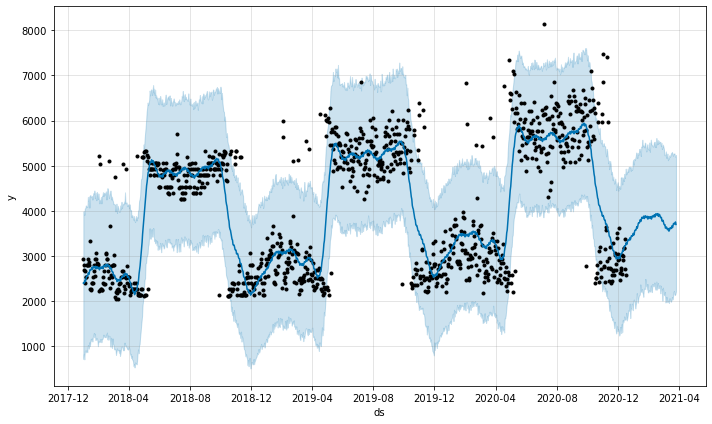

In [27]:
#black dots are actuall values and blue line is the forecast
plot = m.plot(forecast)

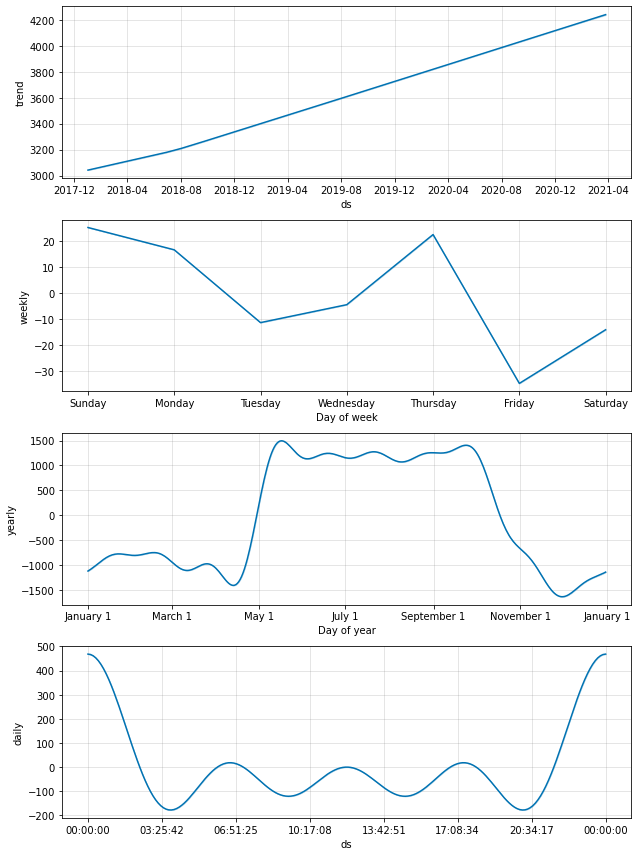

In [29]:
#more detailed individual components
plot2 = m.plot_components(forecast)